# [ICTCOG AI Academy] 7기 고급시각저녁반
# Object Detection (1) - Two Stage 기법 (1)
### Image Classification
- 전통적인 ML
- Featured Data (사람)
- Convolution

- Gradient Vanishing > Underfitting (Relu)


#### Image Classification Review
- 2012 Alexnet 
  - Relu, Dropout
  - Data Augmentation
- 2013 ZFnet
  - Convolution Visualization 
    - 레이어가 깊어지면서 추상적 특징
  - 하이퍼파라미터 튜닝
- 2014 GoogLeNet 
  - 1x1 Convoluiton
  - GAP
- 2014 VGG
  - 3x3 convolution 으로 여러개 레이어 겹침
- 2015 Resnet
  - 최초로 인간을 뛰어넘음 
  - Residual Block
  - BN
- 2016 Ensemble
- 2017 Light 
  - MobileNet


#### [Transfer Learning](https://www.tensorflow.org/tutorials/images/transfer_learning)
- Feature Extractor : Convolution 레이어만 가져오지만 재학습 시키지 않음 (Frozen)
- fine-tunning 
  - 이미 학습된 모델에서 끝 레이어 제외하고 다 가져다 씀(미세조정)
> incremental learning : 기존에 모델에 추가함


- EDA
- 이미지 전처리
  - [0,1] , [-1,1] 범위로 조정
- 최적화 prefetch, cache
- take

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# 사전 훈련된 모델 MobileNet V2  (1000개 분류 가능)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
# Feature Extractor
base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
#fine-tunning
base_model.trainable = True
fine_tune_at = 100

# `fine_tune_at` 층 이전의 모든 층을 고정
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

### Object Recognition
 - image Classification : 이미지내에 대표적 객체 파악
 - Localization  :하나의 객체의 위치 역역(b-box)
 - **Obeject Detection** : 여러 객체 위치 역역(b-box) 찾음
 - semantic segmenation: 클래스 구분
 - instance segmentation: 인스턴스 구분

### Naive Approach
- 이미지 전체 확인

### Region Proposals
- 있을만한 영역을 특정 기준긱반으로 제안
- 훨씬 더 빠른 속도
- region proposals 크기가 상이함

##### Selective Search
- Region Proposals 방식
- 질감, 색, 강도들이 비슷한 픽셀끼리 연결된 것을 찾음
- 유사도가 높은 경우 합쳐지면서 영역이 확대됨
- 버전이 여러개 있음


In [1]:
!pip install selective-search

  Created wheel for selective-search: filename=selective_search-0.1.2.2-cp37-none-any.whl size=8979 sha256=da9216f0d123e8723ad3c1a6d9c495505e5e4f28c1fb5fc4558bb67744c47541
  Stored in directory: /root/.cache/pip/wheels/c9/a2/90/f19103d79bf171dbce304996899567f97cb480737408050071
Successfully built selective-search


[selective_search](https://github.com/ChenjieXu/selective_search/blob/master/examples/example.py)

In [2]:
import selective_search

In [3]:
import skimage
import selective_search

image = skimage.data.astronaut()

# Propose boxes
boxes = selective_search.selective_search(image, mode='single', random_sort=True)

# Filter box proposals
boxes_filter = selective_search.box_filter(boxes, min_size=20, topN=80)

print(boxes_filter)

[(148, 425, 238, 462), (0, 478, 26, 512), (220, 88, 270, 150), (41, 75, 137, 218), (221, 180, 282, 249), (396, 0, 512, 285), (160, 427, 242, 512), (389, 19, 417, 85), (37, 180, 72, 257), (0, 0, 512, 512), (290, 367, 491, 512), (456, 96, 512, 272), (136, 226, 301, 319), (250, 43, 303, 130), (125, 132, 184, 227), (393, 0, 436, 186), (449, 358, 489, 405), (292, 381, 317, 410), (57, 445, 152, 499), (364, 344, 464, 385), (343, 354, 369, 379), (257, 0, 396, 251), (267, 27, 307, 68), (21, 381, 45, 419), (323, 206, 386, 264), (340, 254, 420, 331), (435, 122, 460, 274), (25, 437, 45, 482), (221, 217, 247, 246), (102, 483, 175, 512), (0, 118, 95, 275), (20, 223, 90, 306), (273, 104, 300, 138), (225, 328, 270, 512), (220, 88, 270, 158), (35, 251, 90, 306), (0, 0, 40, 160), (400, 0, 424, 80), (212, 234, 382, 512), (175, 194, 195, 243), (465, 388, 487, 420), (0, 0, 95, 512), (27, 54, 48, 78), (244, 322, 275, 512), (244, 334, 265, 383), (123, 260, 223, 417), (185, 144, 238, 182), (240, 308, 291, 512

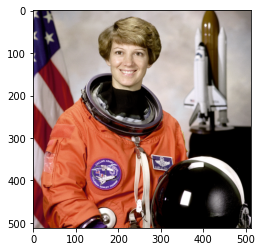

In [6]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [7]:
import skimage
import selective_search

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [8]:
boxes = selective_search.selective_search(image, mode='fast') #fast 모드

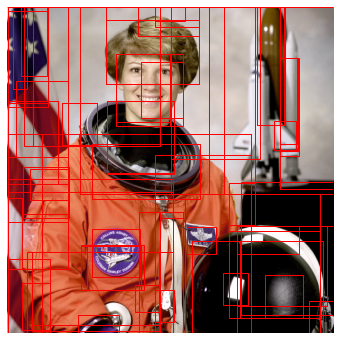

In [9]:
#파라미터 조정
boxes_filter = selective_search.box_filter(boxes, min_size=20, topN=80)

# 이미지에 RP 그리기
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
for x1, y1, x2, y2 in boxes_filter:
    bbox = mpatches.Rectangle(
        (x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(bbox)

plt.axis('off')
plt.show()

- region proposals 크기가 상이함
- resize, crop으로 크기 맞춤
- 후보군 찾고 무엇인지 분류

#### convolution based Approach
- 2-stage
  - 높은 정확도
  - 느린 속도
  - detection 에서 segmentation(pixel 단위) 으로 활용하게 됨
- single-stage 이용하면 더 빠르게 가능
  - 낮은 정확도
  - 빠른 속도 (실시간 적합)
---
### R-CNN
- 2013 detection 1위

- transfer learning 
  - **fine-tunning**
  - sliding window 방식
- 2-stage 
#### 방식
1. Input Image
2. Extract Region Proposals (2000개)
  - selective serach 이용
  - RP 크기가 상이해서 **resizing** 되면서  이미지 왜곡됨 
3. compute CNN features
4. classify Regions
  - linear SVMs


#### R-CNN BB
- bounding-box Regression(BB)
  - multi-output 
  - 각 데이터에 객체의 위치가 4개의 점으로 표현(직사각형)
  - 정답과 예측의 intersection 정도에 따라서 정확도

---
### SPP-net
- Convolution 결과를 **Spatial Pyramid Pooling** 해서 이미지 crop, warp 하는것에 대한 문제점 해결
  - Spatial Pyramid Matching, Bag-of-words 근간을 둠
  - 등분한 후 Global Average pooling 해서 **이미지 크기 상관 없음**
  - > - Convolution은 dense 뒤에 없는 경우 크기와 상관이 없어서 임의의 input 크기를 받을 수 있음
- Object Detection 에서 성능이 좋음
  - 전체 맵 중에서 한번만 feature map 계산
-  처음에 SVM 사용했었다가 Fully-connected layers 로 변경
- selective search 로 mapping 
